### Test copula sampling onshore wind vs load

Get onshore wind data, calculate rank and scale to uniform distr

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt

LOCATION = "DE"

df_onshr_wind = pd.read_csv("scenario_data/windonshore.csv")
df_onshr_wind = df_onshr_wind.drop(columns=["time"])
df_onshr_wind = df_onshr_wind[[LOCATION]]
df_onshr_wind["rank"] = df_onshr_wind.rank(method="first")
df_onshr_wind["rank_value"] = df_onshr_wind["rank"] / len(df_onshr_wind)
df_onshr_wind

,DE,rank,rank_value
0,0.1566,24521.0,0.559534
1,0.1659,25602.0,0.584200
2,0.1746,26539.0,0.605581
3,0.1745,26525.0,0.605262
4,0.1826,27308.0,0.623129
...,...,...,...
43819,0.1123,18710.0,0.426935
43820,0.0935,15809.0,0.360738
43821,0.0813,13812.0,0.315170
43822,0.0701,11905.0,0.271655


Get load data, calculate rank and scale to uniform distr

In [13]:
df_load = pd.read_csv("scenario_data/electricload.csv")
df_load = df_load.drop(columns=["time"])
df_load = df_load[[LOCATION]]
df_load["rank"] = df_load.rank(method="first")
df_load["rank_value"] = df_load["rank"] / len(df_load)
df_load

,DE,rank,rank_value
0,41342.6175,2992.0,0.068273
1,40135.1425,2116.0,0.048284
2,39106.0150,1539.0,0.035118
3,38764.8650,1366.0,0.031170
4,38941.4925,1445.0,0.032973
...,...,...,...
43819,47492.5550,11054.0,0.252236
43820,45842.1775,8396.0,0.191585
43821,45501.1950,7842.0,0.178943
43822,43968.7125,5734.0,0.130842


In [31]:
df_copula = pd.DataFrame(index=range(0, len(df_onshr_wind)))
df_copula["rank_value_x"] = df_copula.join(df_onshr_wind)[["rank_value"]]
df_copula["rank_value_y"] = df_copula.join(df_load)[["rank_value"]]
df_copula

,rank_value_x,rank_value_y
0,0.559534,0.068273
1,0.584200,0.048284
2,0.605581,0.035118
3,0.605262,0.031170
4,0.623129,0.032973
...,...,...
43819,0.426935,0.252236
43820,0.360738,0.191585
43821,0.315170,0.178943
43822,0.271655,0.130842


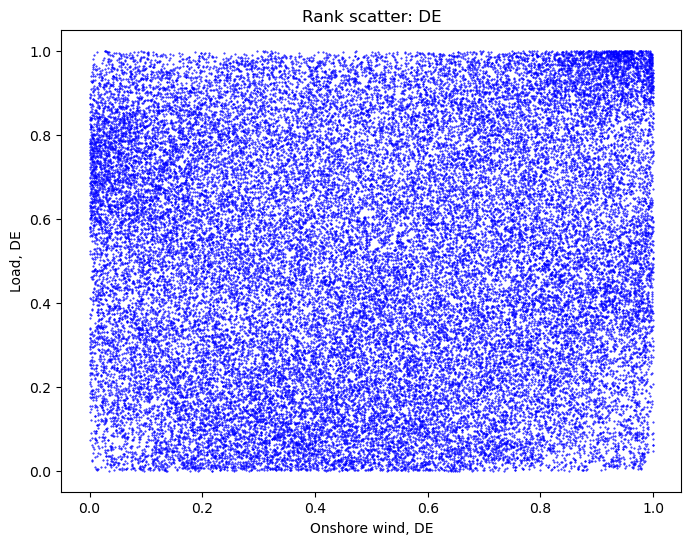

In [33]:
x = df_copula["rank_value_x"]
y = df_copula["rank_value_y"]

plt.figure(figsize=(8,6))
plt.scatter(x, y, color="blue", s=0.2)
plt.xlabel(f"Onshore wind, {LOCATION}")
plt.ylabel(f"Load, {LOCATION}")
plt.title(f"Rank scatter: {LOCATION}")
plt.show()

Test sampling

In [126]:
import numpy as np

# Pick random year (1-5)
sampling_year = np.random.randint(1, 6) #1-5

# Filter to hours for given year
sampling_year_indexes = range(8760*(sampling_year-1), 8760*sampling_year)

# Pick random start hours within given year
sampling_hours_start = sorted(np.random.randint(sampling_year_indexes[0], sampling_year_indexes[-1], size=6))
print(sampling_hours_start)

# Make sure non-overlapping intervals
redo_sampling = True
while redo_sampling:
    solution_good = True
    for i in range(0, len(sampling_hours_start)-1):
        if sampling_hours_start[i] - sampling_hours_start[i+1] > -168:
            sampling_hours_start = sorted(np.random.randint(sampling_year_indexes[0], sampling_year_indexes[-1], size=6))
            solution_good = False
    redo_sampling = False if solution_good else True

# Generate sample data (168 hours x 4 seasons + 2 peaks x 24 hours)
sampling_hours = []
for j in range(0, len(sampling_hours_start)):
    hour = sampling_hours_start[j]
    interval_length = 168 if j < 4 else 24
    for _h in range(hour, hour+interval_length):
        sampling_hours.append(_h)

print(sampling_hours)

[107, 465, 2615, 3609, 3846, 5630]
[107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489,

In [127]:
df_onshr_wind_sample = pd.read_csv("scenario_data/windonshore.csv")
df_onshr_wind_sample = df_onshr_wind_sample.drop(columns=["time"])
df_onshr_wind_sample = df_onshr_wind_sample[[LOCATION]]
df_onshr_wind_sample = df_onshr_wind_sample.filter(items=sampling_hours, axis=0)
df_onshr_wind_sample["rank"] = df_onshr_wind_sample.rank(method="first")
df_onshr_wind_sample["rank_value"] = df_onshr_wind_sample["rank"] / len(df_onshr_wind_sample)
df_onshr_wind_sample

,DE,rank,rank_value
107,0.2892,517.0,0.718056
108,0.2527,499.0,0.693056
109,0.2040,449.0,0.623611
110,0.1761,416.0,0.577778
111,0.1585,377.0,0.523611
...,...,...,...
5649,0.1906,438.0,0.608333
5650,0.2105,453.0,0.629167
5651,0.2242,477.0,0.662500
5652,0.2286,481.0,0.668056


In [128]:
df_load_sample = pd.read_csv("scenario_data/electricload.csv")
df_load_sample = df_load_sample.drop(columns=["time"])
df_load_sample = df_load_sample[[LOCATION]]
df_load_sample = df_load_sample.filter(items=sampling_hours, axis=0)
df_load_sample["rank"] = df_load_sample.rank(method="first")
df_load_sample["rank_value"] = df_load_sample["rank"] / len(df_load_sample)
df_load_sample

,DE,rank,rank_value
107,62952.4275,538.0,0.747222
108,62108.0950,522.0,0.725000
109,61182.2725,503.0,0.698611
110,60449.9175,489.0,0.679167
111,61341.5600,506.0,0.702778
...,...,...,...
5649,66256.4850,614.0,0.852778
5650,65119.3475,586.0,0.813889
5651,64737.7650,574.0,0.797222
5652,64866.5900,580.0,0.805556


In [129]:
df_copula_sample = pd.DataFrame(index=sampling_hours)
df_copula_sample["rank_value_x"] = df_copula_sample.join(df_onshr_wind_sample)[["rank_value"]]
df_copula_sample["rank_value_y"] = df_copula_sample.join(df_load_sample)[["rank_value"]]
df_copula_sample

,rank_value_x,rank_value_y
107,0.718056,0.747222
108,0.693056,0.725000
109,0.623611,0.698611
110,0.577778,0.679167
111,0.523611,0.702778
...,...,...
5649,0.608333,0.852778
5650,0.629167,0.813889
5651,0.662500,0.797222
5652,0.668056,0.805556


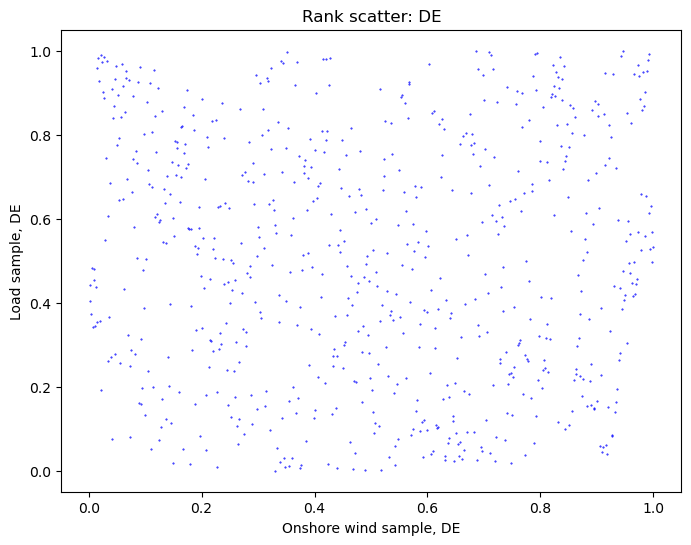

In [130]:
x = df_copula_sample["rank_value_x"]
y = df_copula_sample["rank_value_y"]

plt.figure(figsize=(8,6))
plt.scatter(x, y, color="blue", s=0.2)
plt.xlabel(f"Onshore wind sample, {LOCATION}")
plt.ylabel(f"Load sample, {LOCATION}")
plt.title(f"Rank scatter: {LOCATION}")
plt.show()

Measure distance to original copula

In [131]:
distance = 0
for index, row in df_copula_sample.iterrows():
    sample_x = row["rank_value_x"]
    sample_y = row["rank_value_y"]

    # Based on rank_value_x
    closest_original_row = df_copula.iloc[(df_copula['rank_value_x']-sample_x).abs().argsort()[:1]]

    # Calculate abs distance based on rank_value_y
    distance += abs(closest_original_row["rank_value_y"].values[0]-sample_y)

print(distance)

242.93495345016436
